## Gender-Based Violence Tweet Classification Challenge 

Gender-based violence, or GBV, is an ongoing and ever-resent scourge around the world, and is particularly prevalent in developing and least-developed countries. Gender-based violence also increased in many parts of the world during the COVID-19 pandemic.

One of the greatest challenges in combating GBV is the ‘culture of silence’, where victims of violence are scared, ashamed or intimidated to discuss their experiences with others and often do not report their experiences to authorities.

Another challenge faced by victims is achieving justice for their abusers. Some may not be aware of support systems, or not know where and how to report the perpetrators.

Victims may find and safety sharing their experiences online (as evidenced by the #MeToo movement), allowing them to get more support in an anonymous and/or safe way.

The **objective** of this challenge is create a machine learning algorithm that classifies tweets about GBV into one of five categories:

- Sexual violence
- Emotional violence
- Economic violence
- Physical violence
- Harmful traditional practice

### 1.Install Required Packages 

In [ ]:
!pip install -U nltk #natural language toolkit package

In [ ]:
!pip install numpy # Scientific computing package

In [ ]:
!pip install pandas # data analysis and manipulation package

In [ ]:
!pip install matplotlib # data visualization package

In [ ]:
!pip install seaborn # data visualization package

In [ ]:
!pip install scikit-learn  # machine learning algorithms

In [ ]:
!pip install lightgbm   # machine learning algorithm for classification & regresssion tasks

In [ ]:
!pip install imblearn # handling data imbalance.

### 2 Import Python Packages

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#import classifier algorithm here
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier

#oversampling
from imblearn.over_sampling import SMOTE
from collections import  Counter

import nltk
from nltk.corpus import stopwords  # importing stopwords
from nltk.stem import WordNetLemmatizer
import re  #regular expression
from string import punctuation

nltk.download('stopwords')  #download stopwords
nltk.download('wordnet')  #download wordnet

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 3. Load Data

In [ ]:
import os 
import chdir()

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
# Import data
url = "/content/drive/MyDrive/Zanzibar - Third Workshop in Sept 2022/NLP workshop - Practical Session/data/Train.csv"
data = pd.read_csv(url)


In [28]:
data

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence
...,...,...,...
39645,ID_ZZTLP2L5,"ENTRY 1299: 21F. 23M, BF’s cousin. Got drunk o...",sexual_violence
39646,ID_ZZXB10M6,So you’re telling me Emmanuel Macron was groom...,sexual_violence
39647,ID_ZZY8B7FJ,"My wife regularly beats me, I get dirty slaps ...",Physical_violence
39648,ID_ZZYAFD8L,Me: Hey babe! Police officer boyfriend: is tha...,sexual_violence


In [29]:
# print shape 
print('data shape :', data.shape)

data shape : (39650, 3)


In [30]:
# Inspect Data by shing the first 10 rows 
data.head(10)

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence
5,ID_0052TYKI,"Yes men rape women. But women also rape men, y...",sexual_violence
6,ID_0058QG76,"My Husband Beats Me Frequently, Wife Tells Cou...",Physical_violence
7,ID_005VM1DJ,Pretty sure he raped a 16yr old girl with 2 fr...,sexual_violence
8,ID_0060BW8R,TW sorry to hear that and yeah he recently th...,sexual_violence
9,ID_007FAIEI,"""I understand that... My father was abusive as...",sexual_violence


### 3. Clean Data

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate. Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve our results.

Common data cleaning steps on all text:

- Make text all lower case
- Remove punctuation
- Remove numerical values
- Remove common non-sensical text (/n)
- Tokenize text
- Remove stop words

More data cleaning steps after tokenization:
- Stemming / lemmatization


In [31]:
#remove id feature 

data = data.drop('Tweet_ID', axis=1)


In [32]:
# select english stopwords
stop_words = stopwords.words('english')

# function to clean the text dataset 
def text_cleaning(text):
    # Clean the text, with the option to remove stop_words
 
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text) #remove non-alphanumeric
    text = re.sub(r"http\S+", " link ", text) # replace link with a word "link"
    text = re.sub(r"[0-9]", "", text)  # remove numbers
    text = text.lower() # transform text into lower cases
 
    # Remove punctuation from text (e.g !, ? :,.< / @ )
    text = "".join([c for c in text if c not in punctuation])
 
    # remove stop words (such as “the”, “a”, “an”, “in”)
   
    text = text.split()
    text = [w for w in text if not w in stop_words]
    text = " ".join(text)
 
    # Return a list of words
    return text

In [33]:
# show list of stopwords 
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
#clean data 

data['cleaned_tweets'] = data.tweet.apply(text_cleaning)

In [36]:
# show first 5 rows 
data = data[['tweet','cleaned_tweets','type']]

data.head()

,tweet,cleaned_tweets,type
0,Had a dream i got raped last night. By a guy i...,dream got raped last night guy work actually g...,sexual_violence
1,he thought the word raped means sex and told m...,thought word raped means sex told saw dogs rap...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,talking raped men molested jail nother charge ...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexually abused years age one believed raped b...,sexual_violence
4,Chessy Prout can do better by telling the trut...,chessy prout better telling truth selling owen...,sexual_violence


#### Lemmatization with NLTK
    
Lemmatization is the process of converting a word to its base form.

The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

For example, lemmatization would correctly identify the base form of ‘caring’ to ‘care’, whereas, stemming would cutoff the ‘ing’ part and convert it to car. ‘Caring’ -> Lemmatization -> ‘Care’ ‘Caring’ -> Stemming -> ‘Car’

In [38]:
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [39]:
# example 
lemmatizer = WordNetLemmatizer()
  
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
print("babies :", lemmatizer.lemmatize("babies"))

rocks : rock
corpora : corpus
babies : baby


In [40]:
 #shorten words to their stems
def lemmatize_words(text):
    
    text = text.split()
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
    
    text = " ".join(lemmatized_words)

    # Return a list of words
    return text

In [41]:
# lemmatize the tweets

data['cleaned_tweets'] = data.cleaned_tweets.apply(lemmatize_words)

In [42]:
#check first five rows 

data.head()

,tweet,cleaned_tweets,type
0,Had a dream i got raped last night. By a guy i...,dream got raped last night guy work actually g...,sexual_violence
1,he thought the word raped means sex and told m...,thought word raped mean sex told saw dog rapin...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,talking raped men molested jail nother charge ...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexually abused year age one believed raped br...,sexual_violence
4,Chessy Prout can do better by telling the trut...,chessy prout better telling truth selling owen...,sexual_violence


### 4. Exploratory Data Analysis

In [43]:
#check the target column
data['type'].value_counts(ascending=True) 

Harmful_Traditional_practice      188
economic_violence                 217
emotional_violence                651
Physical_violence                5946
sexual_violence                 32648
Name: type, dtype: int64

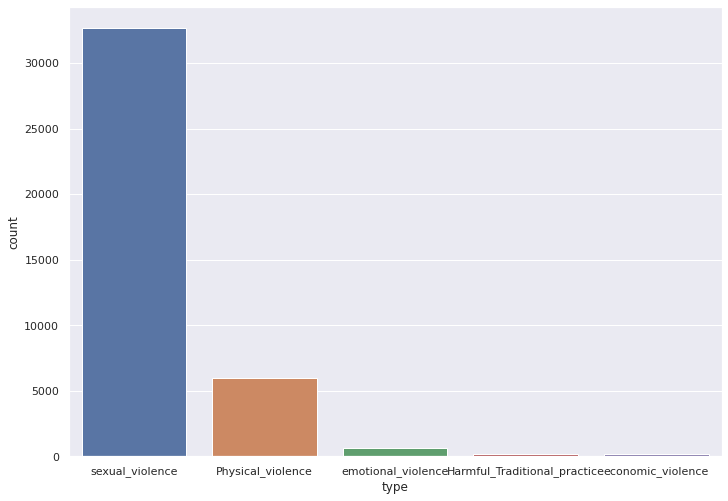

In [44]:
# visualize the target column 

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(data["type"])

The target variable is imbalanced

#### Number of Words


In [45]:
# function to print top 20 common words 
def plot_20_most_common_words(count_data, count_vectorizer,title):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    plt.figure(figsize=(16, 10))
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title(title)
    plt.show()




In [46]:
# Initialise the count vectorizer 
count_vectorizer = CountVectorizer()

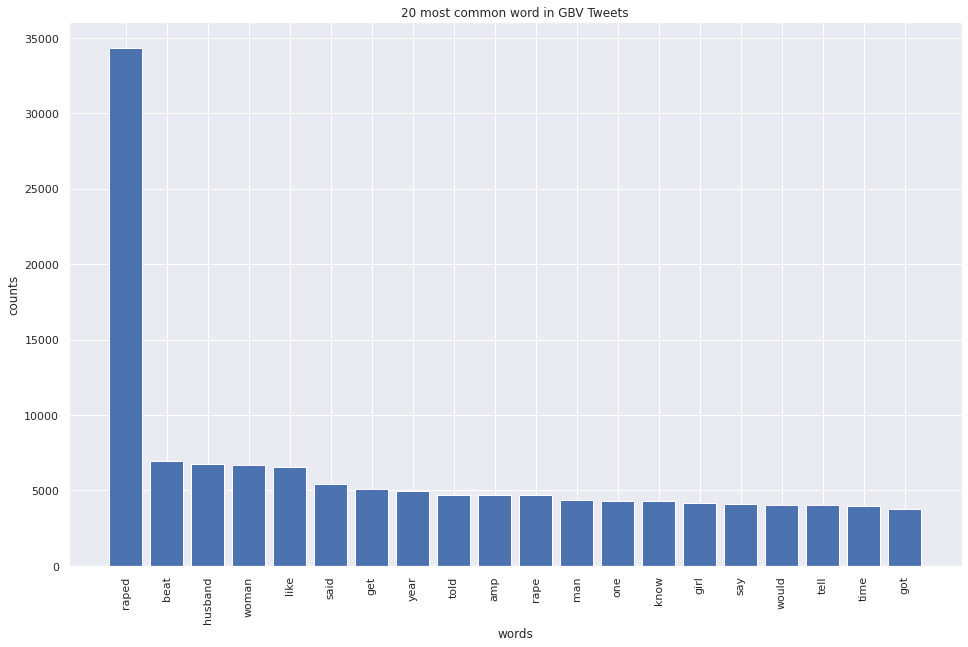

In [47]:
# Fit and transform the processed tweets for swahili only
count_data = count_vectorizer.fit_transform(data.cleaned_tweets)

# Visualise the 20 most common words
plot_20_most_common_words(
    count_data, count_vectorizer, title="20 most common word in GBV Tweets"
)

### 5. Feature Engineering 

##### (a) Lable Encoding our target variable 

Convert the target values from string into numerical values

In [48]:
#import LableEncoder module 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['type'] = le.fit_transform(data['type'])


data.head() 

,tweet,cleaned_tweets,type
0,Had a dream i got raped last night. By a guy i...,dream got raped last night guy work actually g...,4
1,he thought the word raped means sex and told m...,thought word raped mean sex told saw dog rapin...,4
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,talking raped men molested jail nother charge ...,4
3,I was sexually abused for 3 years at age 4 to ...,sexually abused year age one believed raped br...,4
4,Chessy Prout can do better by telling the trut...,chessy prout better telling truth selling owen...,4


In [49]:
#split data into feature and target column 

X = data["cleaned_tweets"]
y = data["type"]

####  (b) Text Vectorization using TFIDFVectorizer

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction. 


![](https://miro.medium.com/max/1400/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)

Terminology :
- t — term (word)
- d — document (set of words)


Read this article to understand more:

- [https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/)
- [https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/](https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/)




In [50]:
#transform tweets into 
tfidf_vectorizer = TfidfVectorizer()

X_vectorized = tfidf_vectorizer.fit_transform(X)


In [51]:
# Splitting the dataset to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized,
                                                    y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=42)

print(X_vectorized.shape)
print(X_train.shape)
print(X_test.shape)

(39650, 32676)
(31720, 32676)
(7930, 32676)


#### (c)Find balance on the Target column 

In [52]:
# perform oversampling on the train set only (X_train,y_train)
sm = SMOTE(n_jobs=-1)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({4: 26118, 1: 26118, 0: 26118, 3: 26118, 2: 26118})


### 6. Train Multiple Machine Learning Models 

LogisticRegression(n_jobs=-1): f1_score is 0.9964485487800312


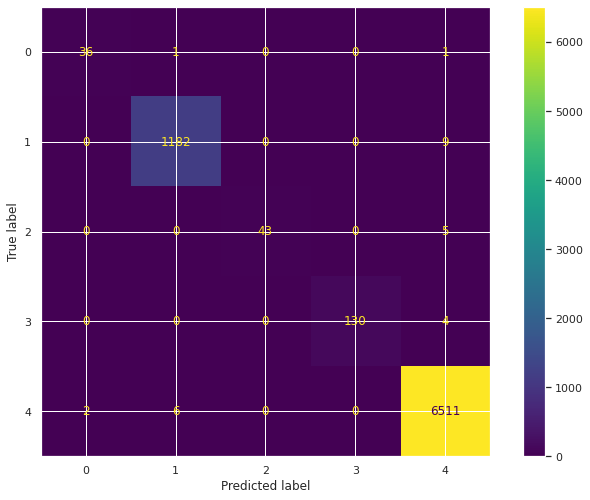

In [53]:
#1. Train Logistic Regression
lg_model = LogisticRegression(n_jobs=-1)

#train model
lg_model.fit(X_res, y_res)

#test model on test set
lg_preds = lg_model.predict(X_test)

#measure model accuracy
score = f1_score(lg_preds, y_test,average='weighted')
print("{}: f1_score is {}".format(lg_model, score))

#Compute confusion matrix to evaluate the accuray of a classification
lg_confusion_table = confusion_matrix(lg_preds, y_test)

#Confusion matrix visualization
cm_display = ConfusionMatrixDisplay(confusion_matrix=lg_confusion_table,
                                    display_labels=[0, 1, 2, 3, 4])

#create the plot
cm_display.plot()

#display the plot
plt.show()

 **Note:**
 
 - 0 - 'Harmful_Traditional_practice', 
 - 1 - 'Physical_violence', 
 - 2 - 'economic_violence', 
 - 3 - 'emotional_violence', 
 - 4 - 'sexual_violence'   

RandomForestClassifier(n_jobs=-1): f1_score is 0.9981740111642428


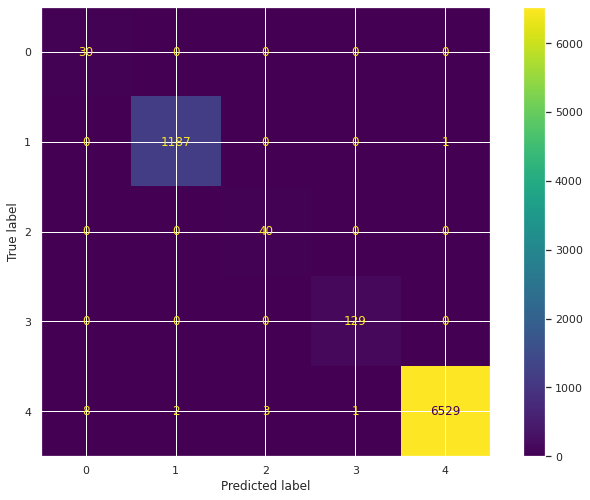

In [54]:
#2. Train Random Forest Classifier
rf_model = RandomForestClassifier(n_jobs=-1)

#train model
rf_model.fit(X_res, y_res)

#test model on test set
rf_preds = rf_model.predict(X_test)

#measure model accuracy
score = f1_score(rf_preds, y_test,average='weighted')
print("{}: f1_score is {}".format(rf_model, score))

#Compute confusion matrix to evaluate the accuray of a classification
rf_confusion_table = confusion_matrix(rf_preds, y_test)

#Confusion matrix visualization
cm_display = ConfusionMatrixDisplay(confusion_matrix=rf_confusion_table,
                                    display_labels=[0, 1, 2, 3, 4])

#create the plot
cm_display.plot()

#display the plot
plt.show()

 **Note:**
 
 - 0 - 'Harmful_Traditional_practice', 
 - 1 - 'Physical_violence', 
 - 2 - 'economic_violence', 
 - 3 - 'emotional_violence', 
 - 4 - 'sexual_violence'   

ExtraTreesClassifier(n_jobs=-1): f1_score is 0.9915709799273441


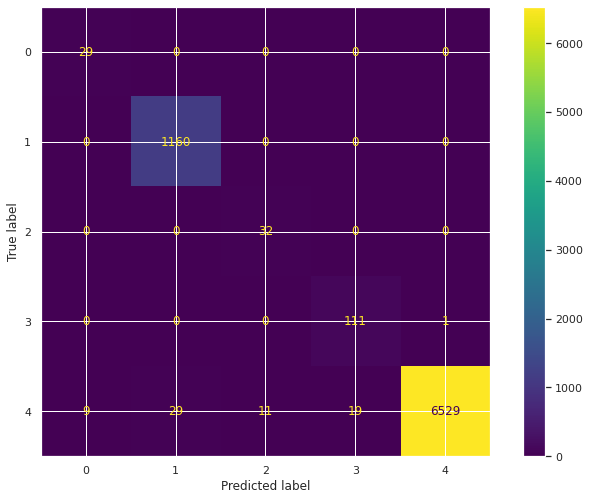

In [55]:
#3. Train Extra Tree Classifier
et_model = ExtraTreesClassifier(n_jobs=-1)

#train model
et_model.fit(X_res, y_res)

#test model on test set
et_preds = et_model.predict(X_test)

#measure model accuracy
score = f1_score(et_preds, y_test,average='weighted')
print("{}: f1_score is {}".format(et_model, score))

#Compute confusion matrix to evaluate the accuray of a classification
et_confusion_table = confusion_matrix(et_preds, y_test)

#Confusion matrix visualization
cm_display = ConfusionMatrixDisplay(confusion_matrix=et_confusion_table,
                                    display_labels=[0, 1, 2, 3, 4])

#create the plot
cm_display.plot()

#display the plot
plt.show()

 **Note:**
 
 - 0 - 'Harmful_Traditional_practice', 
 - 1 - 'Physical_violence', 
 - 2 - 'economic_violence', 
 - 3 - 'emotional_violence', 
 - 4 - 'sexual_violence'   

LGBMClassifier(): f1_score is 0.9994946200120485


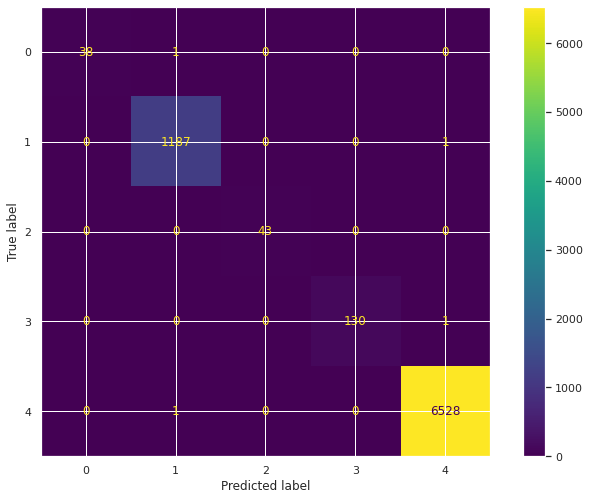

In [56]:
#4. Train Lightgbm Classifier
lightgbm_model = LGBMClassifier(n_jobs=-1)

#train model
lightgbm_model.fit(X_res, y_res)

#test model on test set
lightgbm_preds = lightgbm_model.predict(X_test)

#measure model accuracy
score = f1_score(lightgbm_preds, y_test,average='weighted')
print("{}: f1_score is {}".format(lightgbm_model, score))

#Compute confusion matrix to evaluate the accuray of a classification
lightgbm_confusion_table = confusion_matrix(lightgbm_preds, y_test)

#Confusion matrix visualization
cm_display = ConfusionMatrixDisplay(confusion_matrix=lightgbm_confusion_table,
                                    display_labels=[0, 1, 2, 3, 4])

#create the plot
cm_display.plot()

#display the plot
plt.show()

 **Note:**
 
 - 0 - 'Harmful_Traditional_practice', 
 - 1 - 'Physical_violence', 
 - 2 - 'economic_violence', 
 - 3 - 'emotional_violence', 
 - 4 - 'sexual_violence'   

#### Question: What is the Best model with good performance??